## Анализ данных из Росстат

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Загрузка данных
df0 = pd.read_excel("data/sred_potreb_cen_1991-2022.xlsx", sheet_name=1, skiprows=2)
df0.head(5)

,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Средние потребительские цены на отдельные виды...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,244.55,272.28,314.94,315.02,320.34,330.58,350.05,361.04,416.46,484.17
2,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,214.18,272.36,271.08,264.32,255.87,275.26,264.55,269.14,311.84,307.92
3,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,107.03,136.14,133.73,138.49,126.29,151.27,143.13,145.55,183.54,178.22
4,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,302.94,310.54,344.81,351.27,360.88,382.98,399.37,406.84,450.57,480.16


- Очистка данных

In [6]:
# Удаление пустых строк
df0.dropna(inplace=True)
df0.head()

,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,244.55,272.28,314.94,315.02,320.34,330.58,350.05,361.04,416.46,484.17
2,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,214.18,272.36,271.08,264.32,255.87,275.26,264.55,269.14,311.84,307.92
3,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,107.03,136.14,133.73,138.49,126.29,151.27,143.13,145.55,183.54,178.22
4,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,302.94,310.54,344.81,351.27,360.88,382.98,399.37,406.84,450.57,480.16
5,Консервы мясные3),8.87,163.9,1165.48,2991.46,6692,7375,7811,15.5,18.16,...,79.33,94.42,117.04,121.37,125.21,130.13,139.47,153.5,167.04,580.06


In [7]:
df0.columns

Index([' ПОКАЗАТЕЛИ ',           1991,           1992,           1993,
                 1994,           1995,           1996,           1997,
                 1998,           1999,           2000,           2001,
                 2002,           2003,           2004,           2005,
                 2006,           2007,           2008,           2009,
                 2010,           2011,           2012,           2013,
                 2014,           2015,           2016,           2017,
                 2018,           2019,           2020,           2021,
                 2022],
      dtype='object')

In [8]:
# Конвертация значения ключей в строковой тип
df0.columns = df0.columns.astype("str")
df0.columns

Index([' ПОКАЗАТЕЛИ ', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [9]:
df0.rename(columns={' ПОКАЗАТЕЛИ ': "Годы"}, inplace=True)
df0.head()

,Годы,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,244.55,272.28,314.94,315.02,320.34,330.58,350.05,361.04,416.46,484.17
2,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,214.18,272.36,271.08,264.32,255.87,275.26,264.55,269.14,311.84,307.92
3,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,107.03,136.14,133.73,138.49,126.29,151.27,143.13,145.55,183.54,178.22
4,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,302.94,310.54,344.81,351.27,360.88,382.98,399.37,406.84,450.57,480.16
5,Консервы мясные3),8.87,163.9,1165.48,2991.46,6692,7375,7811,15.5,18.16,...,79.33,94.42,117.04,121.37,125.21,130.13,139.47,153.5,167.04,580.06


In [10]:
# Транспонирование 
df1 = df0.T
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,86,87,88
Годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови38)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,"360,03",122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18


In [11]:
# В качестве ключей устанавливаем значения категорий товаров и услуг
df1.columns = df1.loc["Годы", :]
df1.head()

Годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления34), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови38)
Годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови38)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,"360,03",122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18


In [12]:
df1.drop('Годы', inplace=True)
df1.head()

Годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления34), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови38)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,"360,03",122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18
1995,12547,15053,11587,20016,6692,8325,17488,8050,20075,10460,...,…,951,8077,3886,6185,2638,90428,60847,20704,10471


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1991 to 2022
Data columns (total 86 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0   Говядина (кроме бескостного мяса)                                                                 32 non-null     object
 1   Свинина (кроме бескостного мяса)                                                                  32 non-null     object
 2   Куры охлажденные и мороженые1)                                                                    32 non-null     object
 3   Колбаса вареная2)                                                                                 32 non-null     object
 4   Консервы мясные3)                                                                                 32 non-null     object
 5   Рыба морож

In [14]:
df1.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая ',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6) ', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов9)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта10)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше11), за л',
       'Коньяк ординарный отечественный12), за  л',
       'Вино игристое отечественное13), за  л', 'Пиво14), за л',
       

In [15]:
df1['Говядина (кроме бескостного мяса)'].unique()

array([15.54, 221.5, 2201.27, 5186.28, 12547, 14137, 15787, 30.04, 42.01,
       52.72, 70.33, 72.56, 73.9, 93.41, 115.77, 131.67, 139.49, 174.86,
       185.6, 197.64, 234.49, 248.47, 244.55, 272.28, 314.94, 315.02,
       320.34, 330.58, 350.05, 361.04, 416.46, 484.17], dtype=object)

In [16]:
# Конвертация данных в числа с плавающей точкой
df1 = df1.astype("float")

ValueError: could not convert string to float: '…'

In [17]:
# Замена '...' на 0.0
df1.replace('…', 0.0, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1991 to 2022
Data columns (total 86 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Говядина (кроме бескостного мяса)                                                                 32 non-null     float64
 1   Свинина (кроме бескостного мяса)                                                                  32 non-null     float64
 2   Куры охлажденные и мороженые1)                                                                    32 non-null     float64
 3   Колбаса вареная2)                                                                                 32 non-null     float64
 4   Консервы мясные3)                                                                                 32 non-null     float64
 5   Рыб

In [18]:
df1['Еврошифер20), за 10 м2'].unique()

array([0.0, '...', 31986.77, 99732, 118529, 126831, 139.32, 213.93, 269.5,
       335.63, 398.32, 460.27, 508.15, 646.24, 734.86, 913.71, 1142.04,
       1144.83, 1154.66, 1232.19, 1289.04, 1368.75, 1425.95, 1494.21,
       1535.18, 2717.7, 2752.78, 2949.49, 3109.3, 4151.1, 4460.36],
      dtype=object)

In [19]:
# Замена '...' на 0.0
df1.replace('...', 0, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1991 to 2022
Data columns (total 86 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Говядина (кроме бескостного мяса)                                                                 32 non-null     float64
 1   Свинина (кроме бескостного мяса)                                                                  32 non-null     float64
 2   Куры охлажденные и мороженые1)                                                                    32 non-null     float64
 3   Колбаса вареная2)                                                                                 32 non-null     float64
 4   Консервы мясные3)                                                                                 32 non-null     float64
 5   Рыб

In [20]:
df1['Постановка набоек, за пару'].unique()

array([4.75, 92.17, 1683, 5498.27, 11532, 15024, 17168, 21.15, 28.7,
       36.42, 45.1, 56.28, 66.96, 79.6, 93.12, 105.53, 121.67, 145.52,
       166.34, '180,16', 212.25, 228.73, 241.94, 260.75, 290.62, 318.79,
       325.66, 330.22, 342.9, 351.59, 390.92, 408.82], dtype=object)

In [22]:
# Заменяем запятые на точки в значениях вроде '180,16'
df1.replace(',', '.', regex=True, inplace=True)
df1 = df1.astype('float')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1991 to 2022
Data columns (total 86 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Говядина (кроме бескостного мяса)                                                                 32 non-null     float64
 1   Свинина (кроме бескостного мяса)                                                                  32 non-null     float64
 2   Куры охлажденные и мороженые1)                                                                    32 non-null     float64
 3   Колбаса вареная2)                                                                                 32 non-null     float64
 4   Консервы мясные3)                                                                                 32 non-null     float64
 5   Рыб

In [23]:
# Проверка ключей
df1.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая ',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6) ', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов9)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта10)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше11), за л',
       'Коньяк ординарный отечественный12), за  л',
       'Вино игристое отечественное13), за  л', 'Пиво14), за л',
       

In [24]:
# Удаление лишних символов пробела из ключей
df1.columns = df1.columns.str.strip(' ')
df1.columns


Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6)', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов9)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта10)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше11), за л',
       'Коньяк ординарный отечественный12), за  л',
       'Вино игристое отечественное13), за  л', 'Пиво14), за л',
       'П

In [25]:
df1.head(10)

Годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления34), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови38)
1991,15.54,14.38,13.57,17.00,8.87,2.32,5.72,3.91,12.24,5.48,...,0.0,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.50,4.54
1992,221.50,260.00,194.76,271.00,163.90,129.50,272.60,120.00,413.00,190.00,...,0.0,3.40,35.10,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.30,1165.48,1088.73,2598.96,1040.71,2912.58,1364.90,...,0.0,29.00,595.00,498.00,498.00,249.00,10304.00,6664.00,1614.00,777.00
1994,5186.28,6579.38,5677.09,8984.10,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,0.0,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18
1995,12547.00,15053.00,11587.00,20016.00,6692.00,8325.00,17488.00,8050.00,20075.00,10460.00,...,0.0,951.00,8077.00,3886.00,6185.00,2638.00,90428.00,60847.00,20704.00,10471.00
1996,14137.00,16810.00,13815.00,22859.00,7375.00,9398.00,19912.00,8540.00,22968.00,8412.00,...,0.0,1184.00,12083.00,4617.00,9106.00,3805.00,134568.00,83494.00,29400.00,13922.00
1997,15787.00,19055.00,16061.00,26767.00,7811.00,9912.00,21402.00,8468.00,23238.00,9589.00,...,0.0,2449.00,15661.00,4948.00,12996.00,4581.00,168016.00,118718.00,35055.00,19491.00
1998,30.04,33.99,30.74,43.81,15.50,18.93,32.13,13.85,64.44,23.43,...,0.0,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.90,24.40
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,0.0,4.31,25.40,13.09,25.12,7.90,264.25,197.90,52.67,31.22
2000,52.72,58.45,48.80,77.97,19.52,29.54,61.22,21.15,69.12,23.20,...,0.0,5.66,39.16,23.11,33.60,9.19,351.35,279.76,62.97,37.99


In [26]:
# Срез датафрейма
df2 = df1.loc['1998':, :]
df2.head(10)

Годы,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления34), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день35)","Санаторий36), за день","Дом отдыха, пансионат37), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови38)
1998,30.04,33.99,30.74,43.81,15.50,18.93,32.13,13.85,64.44,23.43,...,0.0,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.90,24.40
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,0.0,4.31,25.40,13.09,25.12,7.90,264.25,197.90,52.67,31.22
2000,52.72,58.45,48.80,77.97,19.52,29.54,61.22,21.15,69.12,23.20,...,0.0,5.66,39.16,23.11,33.60,9.19,351.35,279.76,62.97,37.99
2001,70.33,79.22,56.92,96.01,24.07,36.57,75.98,25.08,71.73,33.07,...,0.0,6.89,52.31,34.39,45.08,11.57,444.06,352.04,76.60,46.89
2002,72.56,80.98,58.38,101.57,26.55,40.39,87.99,25.11,80.08,35.76,...,0.0,9.47,70.85,48.66,61.77,15.50,551.39,426.89,99.77,59.21
2003,73.90,82.42,69.32,106.66,28.18,42.99,93.15,25.67,87.96,38.16,...,0.0,12.34,81.07,58.52,72.06,16.39,631.81,488.84,116.43,66.94
2004,93.41,110.47,69.94,129.94,32.04,48.68,107.99,27.61,93.96,39.10,...,0.0,14.36,93.15,74.73,89.70,19.95,724.84,548.62,138.84,77.96
2005,115.77,131.64,81.35,142.85,37.01,55.76,130.65,30.79,102.42,40.06,...,0.0,18.08,110.62,88.63,111.43,26.53,822.07,608.58,171.36,94.60
2006,131.67,142.00,78.37,153.94,40.10,58.69,144.92,32.28,109.71,39.41,...,0.0,20.63,129.87,103.34,134.44,33.87,940.57,714.24,197.08,110.21
2007,139.49,149.02,88.20,166.96,43.13,62.82,154.98,35.20,155.10,60.26,...,0.0,24.30,145.15,114.32,162.11,37.24,1100.52,844.67,223.27,128.21


In [28]:
# Сохрание в формате Excel
df2.to_excel("data/my_cen_data_1998_2022.xlsx")

-  Анализ данных

In [30]:
# Минимальная цена
df2['Говядина (кроме бескостного мяса)'].min()

30.04

In [32]:
# Максимальная цена
df2['Говядина (кроме бескостного мяса)'].max()

484.17

In [34]:
# В сколько раз изменилась средняя цена на товар или услугу за весь период
product = 'Хлеб и булочные изделия из пшеничной муки различных сортов9)'
df2.loc["2022", product] / df2.loc["1998", product]

13.27258566978193

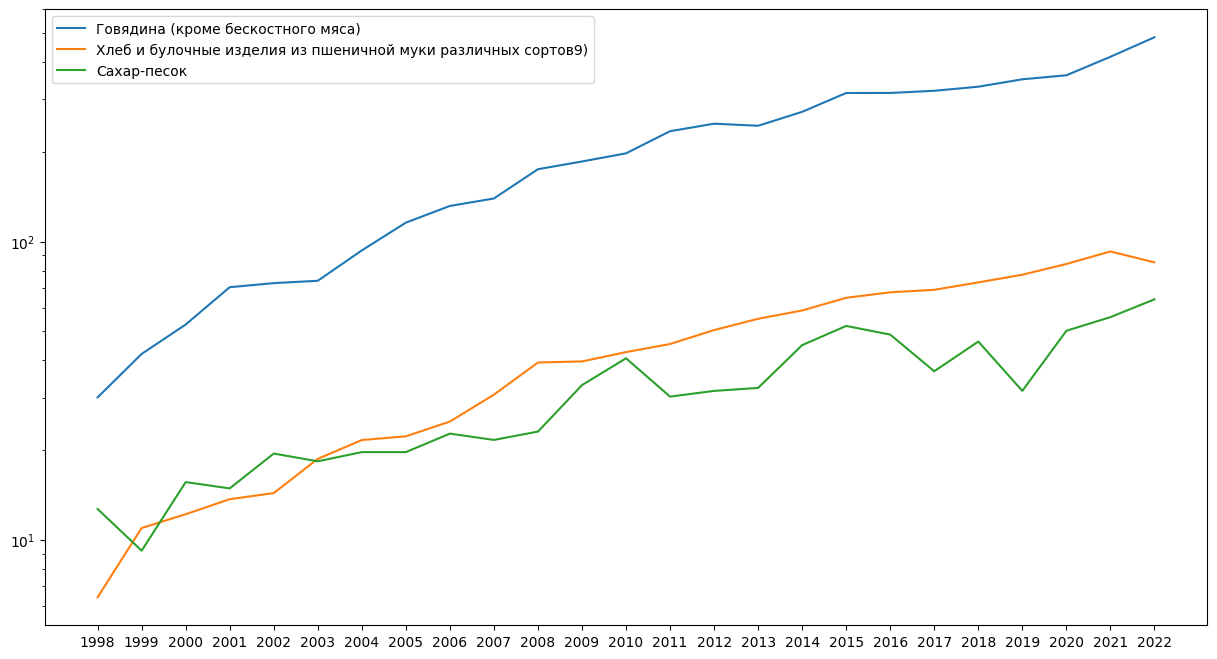

In [38]:
# Визуализация динамики изменения цен на некоторые товары и услуги
plt.figure(figsize=(15,8))

idx = df2.index

products = ['Говядина (кроме бескостного мяса)', 'Хлеб и булочные изделия из пшеничной муки различных сортов9)', 'Сахар-песок']

for k in products:
    plt.plot(idx, df2[k])

plt.legend(products)

plt.yscale("log")

plt.show()

In [29]:
df2.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6)', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов9)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта10)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше11), за л',
       'Коньяк ординарный отечественный12), за  л',
       'Вино игристое отечественное13), за  л', 'Пиво14), за л',
       'П